In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
    df.duplicated(subset=['sepal_width', 'sepal_length'])

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [7]:
    df.duplicated().sum()

1

In [8]:
pd.concat([df, df], axis = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
df_new = pd.concat([df, df], axis = 0)
#same as df.append(df)

In [11]:
df_new.drop_duplicates()
#subset, inplace are some imp parameters

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df_new.loc[df.species == 'setosa', ['petal_width', 'sepal_width']] = np.NaN

In [13]:
df_new.loc[df.species == 'setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,NaN,setosa
1,4.9,NaN,1.4,NaN,setosa
2,4.7,NaN,1.3,NaN,setosa
3,4.6,NaN,1.5,NaN,setosa
4,5.0,NaN,1.4,NaN,setosa


In [14]:
df_new.isnull().sum()

sepal_length      0
sepal_width     100
petal_length      0
petal_width     100
species           0
dtype: int64

In [15]:

df_new.fillna('mean')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,mean,1.4,mean,setosa
1,4.9,mean,1.4,mean,setosa
2,4.7,mean,1.3,mean,setosa
3,4.6,mean,1.5,mean,setosa
4,5.0,mean,1.4,mean,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df.sepal_width.mean()

3.0573333333333337

# pd_plotting

<AxesSubplot: >

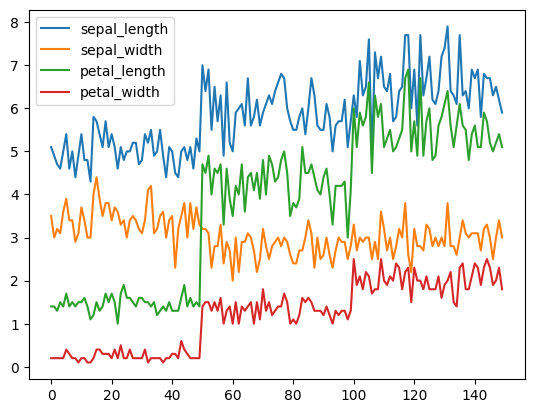

In [17]:
df.plot()

<AxesSubplot: >

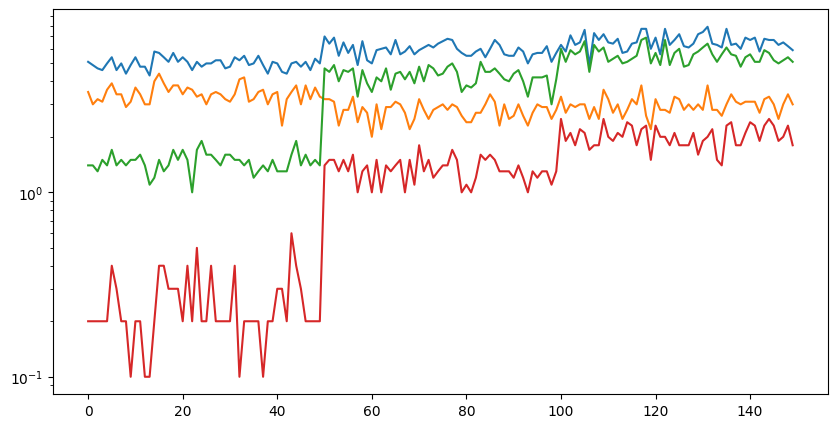

In [18]:
df.plot(legend = False, figsize = (10,5), logy = True)

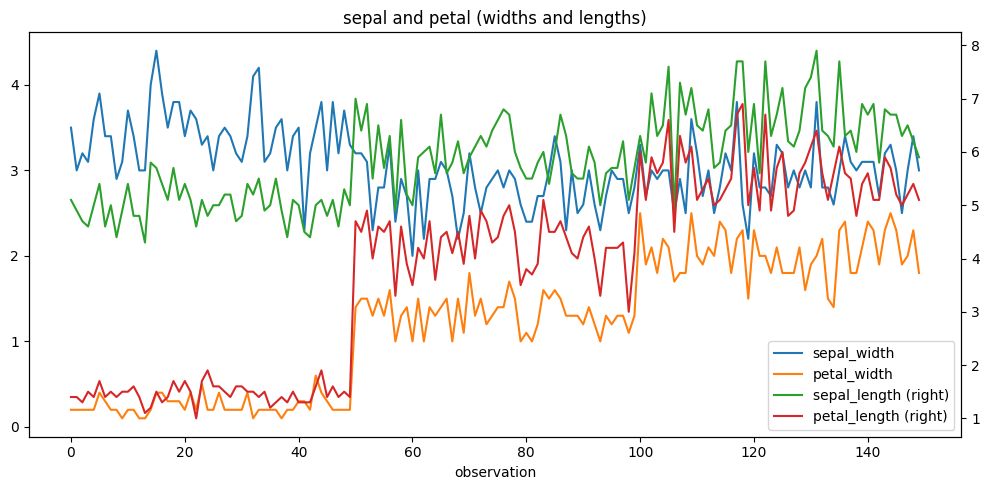

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
df.loc[:, ['sepal_width', 'petal_width']].plot(ax = ax)
df.loc[:, ['sepal_length', 'petal_length']].plot(ax = ax, secondary_y = True)
ax.set_xlabel('observation')
ax.set_title('sepal and petal (widths and lengths)')
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='species'>

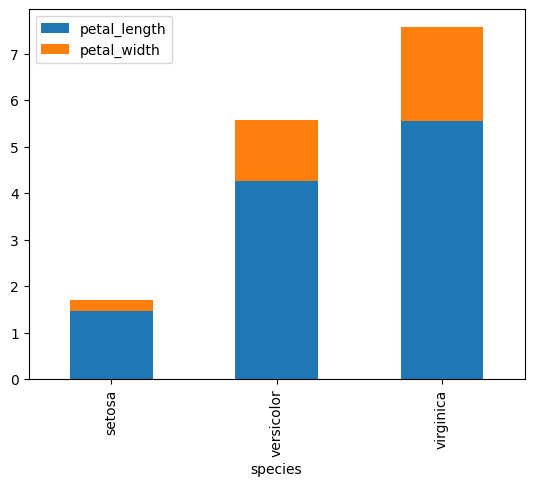

In [20]:
df.groupby('species')[['petal_length', 'petal_width']].agg('mean').plot.bar(stacked = True)

In [21]:
pd.DataFrame(np.random.randn(25,4), columns = ['a', 'b', 'c', 'd'])

,a,b,c,d
0,-2.699086,0.527014,0.640289,0.019022
1,-0.316758,0.472378,0.733777,-0.844874
2,-0.249119,-0.818883,-0.207787,1.411894
3,-0.486648,-0.342772,1.022723,-0.360256
4,-1.462254,0.013951,-1.415722,0.425023
5,1.982406,0.605808,-0.370586,-0.868258
6,0.096334,-0.885659,1.593001,1.245223
7,0.353650,-1.276116,1.268651,-0.323735
8,0.426198,-0.823195,2.180650,-0.606414
9,1.187144,0.534037,1.300609,-0.871554


In [22]:
x = pd.DataFrame(np.random.randn(25,4), columns = ['a', 'b', 'c', 'd'])

<AxesSubplot: >

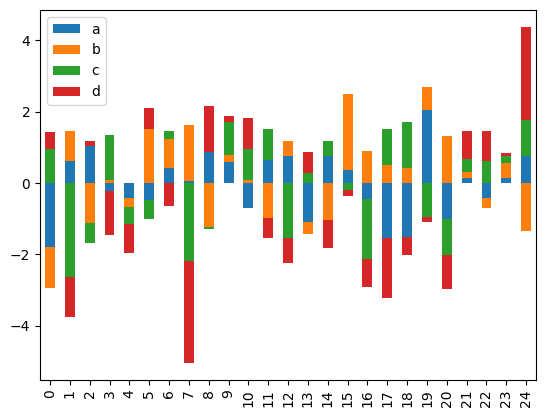

In [23]:
x.plot.bar(stacked = True)

<AxesSubplot: >

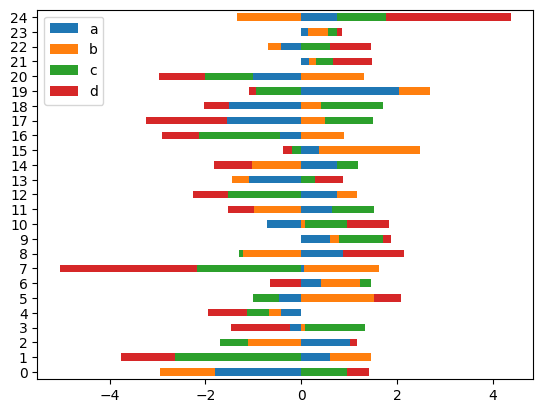

In [24]:
x.plot.barh(stacked = True)

<AxesSubplot: ylabel='Frequency'>

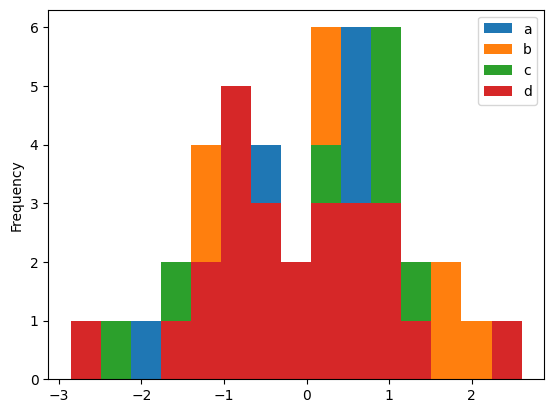

In [25]:
x.plot.hist(bins = 15)

<AxesSubplot: ylabel='Frequency'>

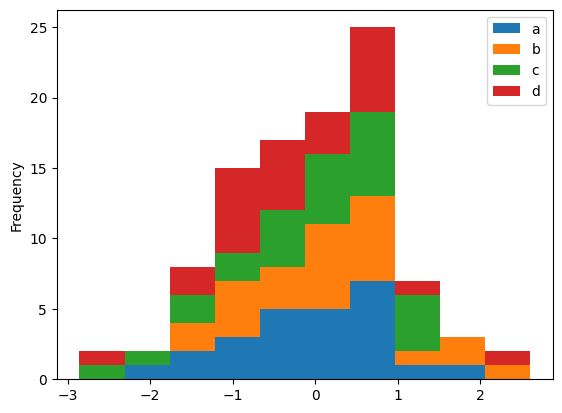

In [26]:
x.plot.hist(stacked = True)

<AxesSubplot: xlabel='Frequency'>

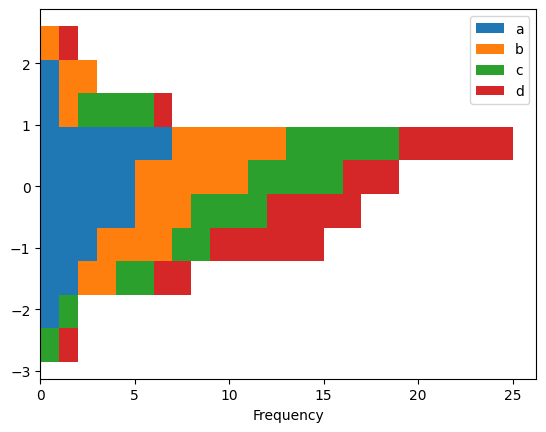

In [27]:
x.plot.hist(stacked = True, orientation = 'horizontal')

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'd'}>]], dtype=object)

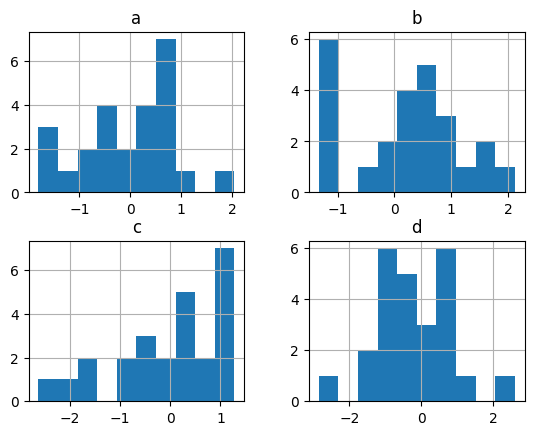

In [28]:
x.hist()

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'c'}>,
        <AxesSubplot: title={'center': 'd'}>]], dtype=object)

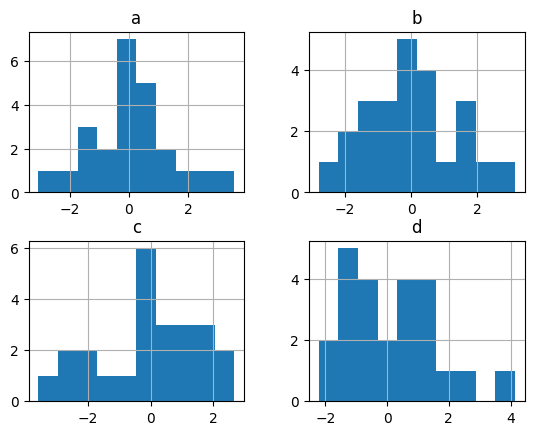

In [29]:
x.diff().hist()

In [30]:
x.sample(3)

,a,b,c,d
18,-1.514683,0.424019,1.278839,-0.506003
15,0.372489,2.117524,-0.185624,-0.186573
6,0.418036,0.810175,0.220913,-0.642214


<AxesSubplot: >

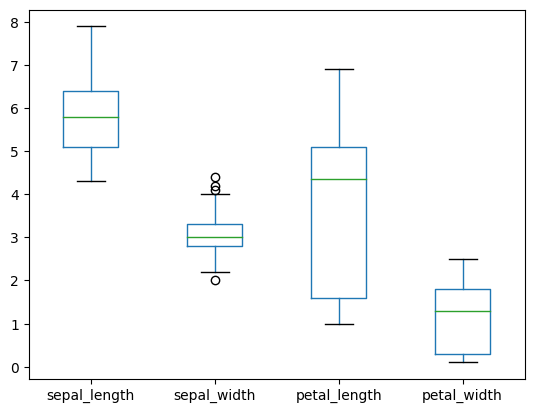

In [31]:
df.plot(kind = 'box')

<AxesSubplot: >

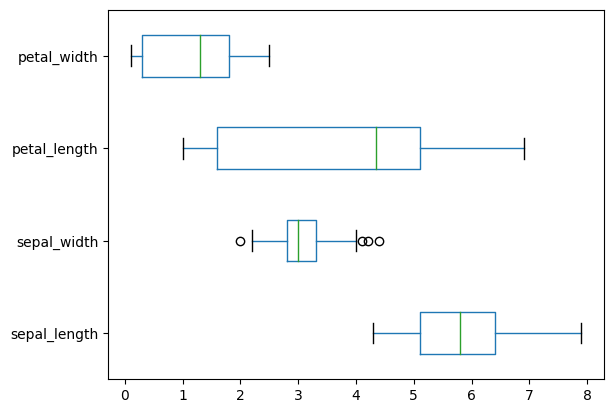

In [32]:
df.plot(kind = 'box', vert = False)

<AxesSubplot: >

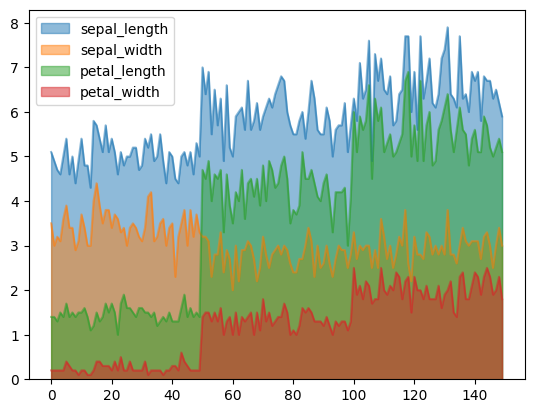

In [33]:
df.plot(kind = 'area', stacked = False)

<AxesSubplot: >

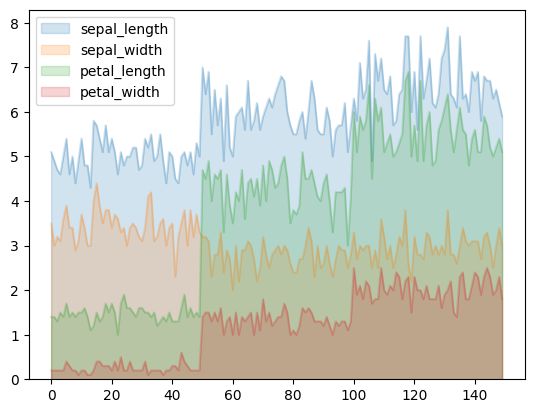

In [34]:
df.plot(kind = 'area', stacked = False, alpha = 0.2)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_width', ylabel='petal_width'>

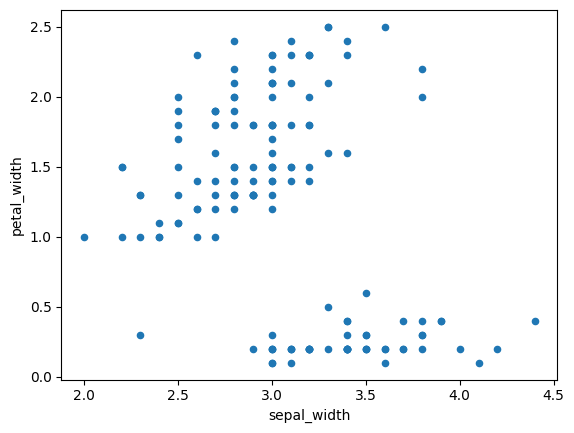

In [35]:
df.plot.scatter(x = 'sepal_width', y = 'petal_width')

<AxesSubplot: xlabel='sepal_width', ylabel='petal_width'>

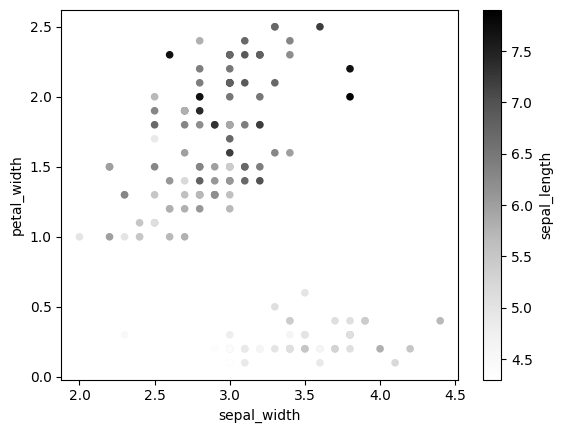

In [38]:
df.plot.scatter(x = 'sepal_width', y = 'petal_width', c = 'sepal_length')

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

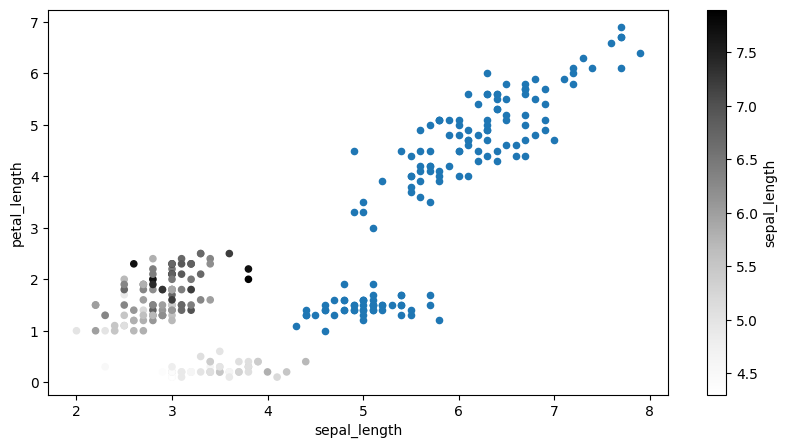

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
df.plot.scatter(x = 'sepal_width', y = 'petal_width', c = 'sepal_length', ax = ax)
df.plot(kind = 'scatter', x = 'sepal_length', y = 'petal_length', ax = ax)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

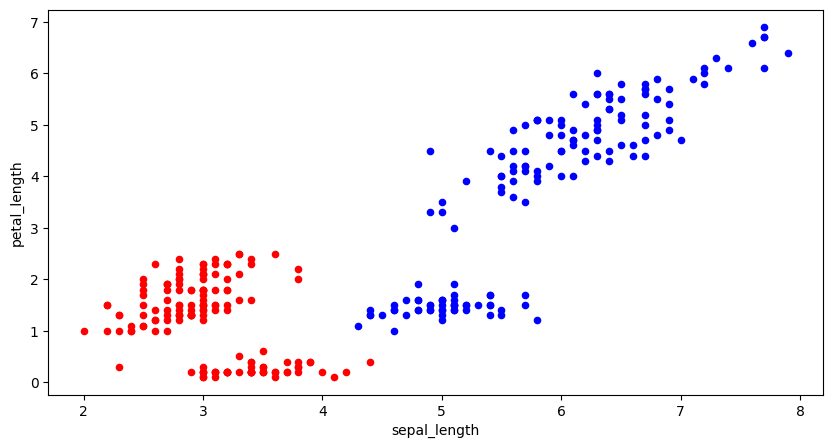

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
df.plot.scatter(x = 'sepal_width', y = 'petal_width', c = 'r', ax = ax)
df.plot(kind = 'scatter', x = 'sepal_length', y = 'petal_length', c = 'b', ax = ax)

<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

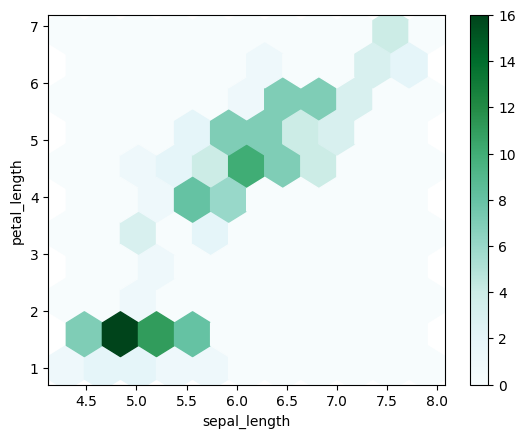

In [41]:
df.plot.hexbin(x = 'sepal_length', y = 'petal_length', gridsize = 10)

<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

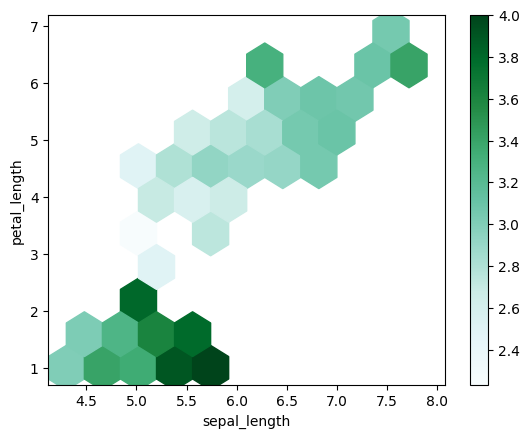

In [44]:
df.plot.hexbin(x = 'sepal_length', y = 'petal_length', gridsize = 10, C = 'sepal_width')

<AxesSubplot: ylabel='0'>

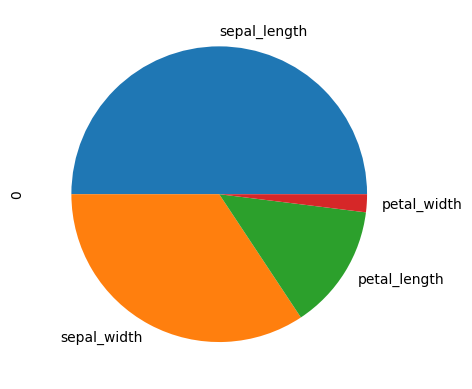

In [50]:
df.iloc[0, :-1].plot.pie()

array([<AxesSubplot: ylabel='sepal_length'>,
       <AxesSubplot: ylabel='sepal_width'>,
       <AxesSubplot: ylabel='petal_length'>,
       <AxesSubplot: ylabel='petal_width'>], dtype=object)

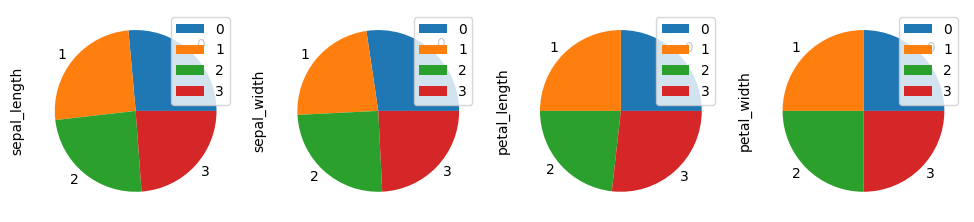

In [54]:
df.iloc[0:4, :-1].plot.pie(figsize = (12, 6), subplots = True)

array([<AxesSubplot: ylabel='0'>, <AxesSubplot: ylabel='1'>,
       <AxesSubplot: ylabel='2'>, <AxesSubplot: ylabel='3'>], dtype=object)

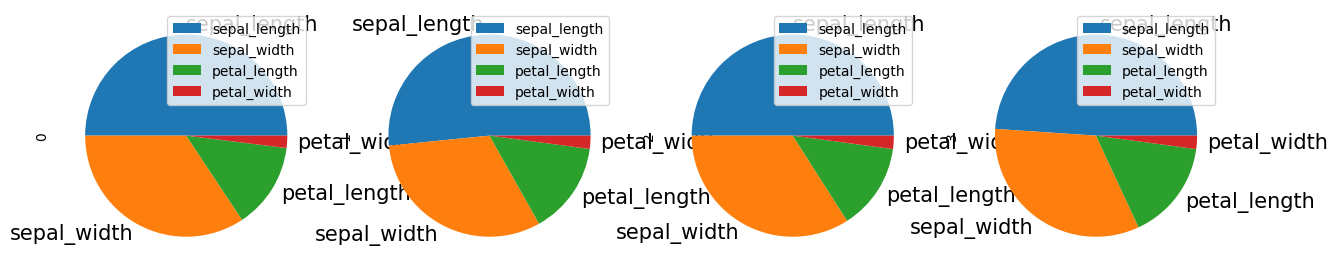

In [58]:
df.iloc[0:4, :-1].T.plot.pie(figsize = (15, 7), subplots = True, fontsize = 15)

In [57]:
df.iloc[0:4, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


array([<AxesSubplot: ylabel='0'>, <AxesSubplot: ylabel='1'>,
       <AxesSubplot: ylabel='2'>, <AxesSubplot: ylabel='3'>], dtype=object)

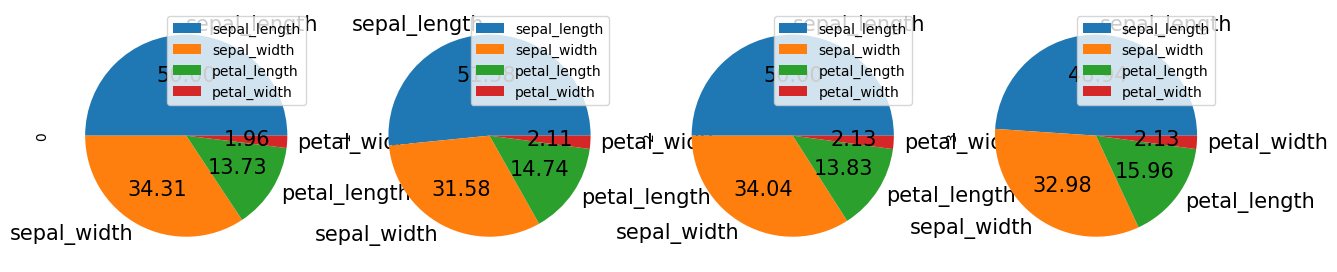

In [61]:
df.iloc[0:4, :-1].T.plot.pie(figsize = (15, 7), subplots = True, fontsize = 15, autopct = '%.2f')

In [62]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot: xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot: xlabel='petal_length',

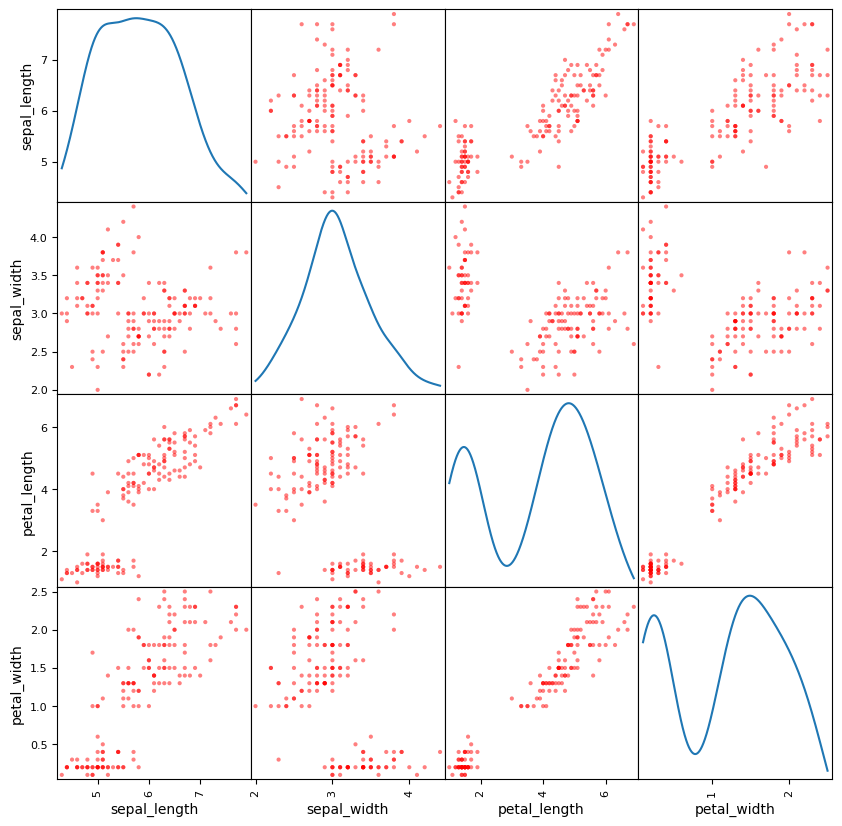

In [65]:
scatter_matrix(df, figsize = (10, 10), diagonal = 'kde', color = 'r')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

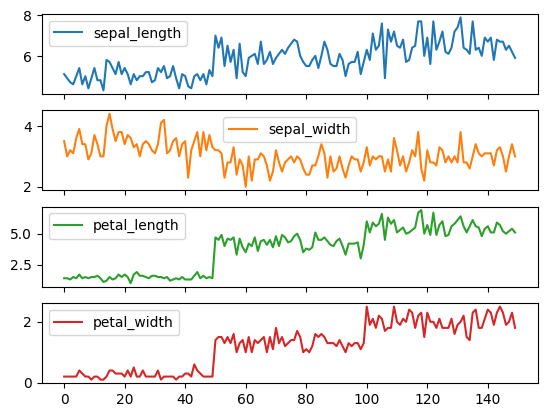

In [66]:
df.plot(subplots = True)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

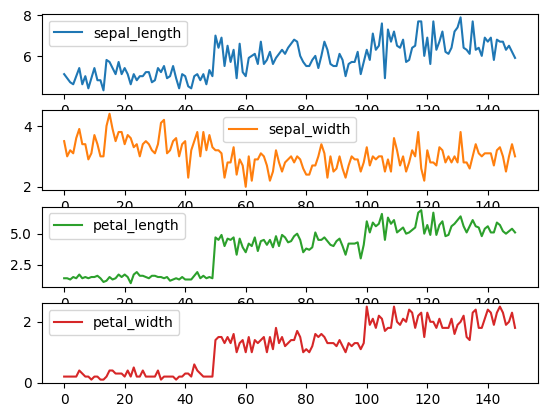

In [68]:
df.plot(subplots = True, sharex = False)

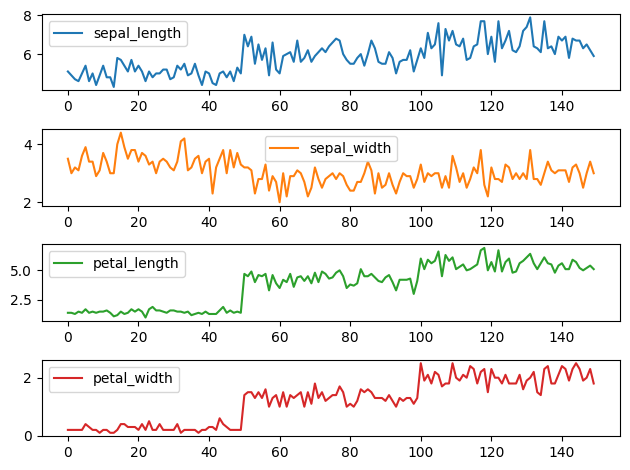

In [69]:
df.plot(subplots = True, sharex = False)
plt.tight_layout()

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

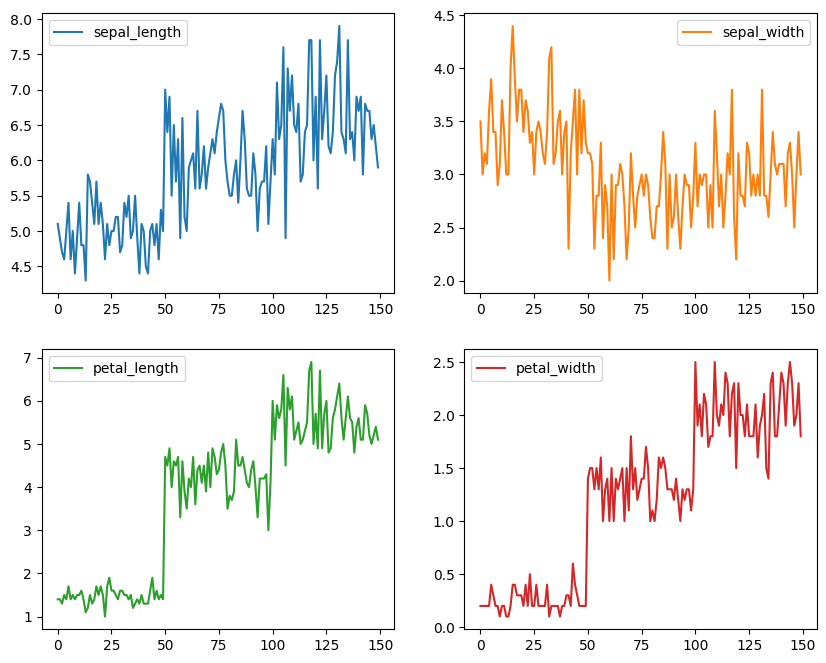

In [72]:
df.plot(subplots = True, sharex = False, layout = (2, 2), figsize = (10, 8))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eef7294e-5c83-4c47-a5ba-0ae830c6eda3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>